In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from collections import Counter
import re
from nltk.stem.porter import *

# What Words Do Children Learn And When
## Do Children Understand Fairy Tales, We Read To Them

*Author: Sashka Ignatova, Software University, Sofia, ignatovasashka@gmail.com*

#### Abstract

This article analyses how a set of psycholinguistic factors may account for children’s lexical development. Age of acquisition is compared to frequency of word use, word class and linguistic setting to see a relation to children’s early lexical development. Age of acquisition correlated highly with vocabulary size of acquisition. Young children start to learn concrete words, earlier than abstract words and concepts. Frequency of word use seem to have slight effect on children learnability for separate specific parts of the speech, like "people", "games & routines" and "sound effects".

#### Key words 
acquisition, age of acquisition, CDI, frequency, imageability, lexical development, phonological neighbourhood density, psycholinguistics, vocabulary size, word class, abstract words, concrete words

#### 1. Introduction
When children are born they don’t know any words. By the time they’re three, most children know 200 words or more. These words aren’t randomly selected from the language they’re learning, however. A two-year-old is much more likely to know the word “bottle” than the word “titration”. What words do children learn at each age, and what qualities do those words have? This study represents data about children from 12 to 36 months old.
Many of the studies on child language which have been published are concerned mostly with a count of words known to a child at a certain age. Some of them neglect to state that difficulties comes from the comparison of different children in different circumstances. There is a general agreement that the number of words understood is much larger than that of words spoken.


#### 2. Research Questions and Hypothesis
What words do children learn and at what age? Do young children understand preschool animated television series like "Pepa Pig" and does it depend on the type of the most frequent words in that kind of texts.

#### 2. Data and Privacy
This dataset was collected by Pernille Hansen:

Hansen (2016). What makes a word easy to acquire? The effects of word class, frequency, imageability and phonological neighbourhood density on lexical development. First Language. Advance online publication. doi: 10.1177/0142 723716679956 http://dx.doi.org/10.1177/0142723716679956

The main dataset includes information for 731 Norwegian words. The table includes measures of how frequently each word is used when an adult is talking to a child(observed in the [Norwegian Web as Corpus dataset](https://www.hf.uio.no/iln/om/organisasjon/tekstlab/prosjekter/nowac/)). The latter is commonly called “child directed speech” and is abbreviated as “CDS”. The Norwegian Communicative Development Inventories (CDI) norms were used to calculate each CDI word’s age of acquisition and vocabulary size of acquisition. Lexical properties were downloaded from the lexical database Norwegian Words, supplemented with data on frequency in adult and child-directed speech.

Main data:
* IDCDII: Word ID from the Norwegian adaptation of the MacArthur-Bates Communicative Development Inventories, version 1
* IDCDIII: Word ID from the Norwegian adaptation of the MacArthur-Bates Communicative Development Inventories, version 2
* Word_NW: The word in Norwegian
* Word_CDI: The form of the word found in the Norwegian adaptation of the MacArthur-Bates Communicative Development Inventories
* Translation: the English translation of the Norwegian word
* AoA: how old a child generally is was when they this this word, in months (Estimated from the [MacArthur-Bates Communicative Development Inventories](https://mb-cdi.stanford.edu/))
* VSoA: how many other words a child generally knows when they learn this word (rounded up to the nearest 10)
* Lex_cat: the specific part of speech of the word
* Broad_lex: the broad part of speech of the word
* Freq: a measure of how commonly this word occurs in Norwegian
* CDS_Freq: a measure of how commonly this word occurs when a Norwegian adult is talking to a Norwegian child(based on Norwegian [CHILDES corpora](https://childes.talkbank.org/))

#### 3. Related Research
Werner Leopold created a 4-volume diary of the language development of his daughter learning English and German. We have a [PDF copy of the first volume](https://childes.talkbank.org/diaries/Leopold.pdf) in which he categorised all the sounds and words in the vocabulary of a two year old. He classifies the words "I", "me", "we" and "us" as four separate words, because the words should represent a single concept of the child. Words like "choo-choo" are with extended meaning that is transfered from one function to related ones. Also words that are very similar in English and German were difficult to establish with certainty that are applied in the speech with a given meaning from the point of view of the child. Permanent words were considered words which were alive in spontaneous use at the end of the second year.

This [Research Article](https://pure.mpg.de/rest/items/item_3238784_4/component/file_3241384/content) of Caroline F. Rowland shows that one activity is that has been shown to support children’s
early language development is shared book reading. Research has indicated that shared book reading can support
a wide range of early language skills, including vocabulary
growth (e.g., Elley, 1989; Farrant & Zubrick, 2011), narrative and conversation skills (e.g., Morrow, 1988; Reese,
1995), print awareness (e.g., Justice & Ezell, 2000, 2004),
future reading ability (e.g., Bus et al., 1995), and phonological awareness (e.g., Chow et al., 2008; Lefebvre et al.,
2011). There is also evidence that children who are read to
regularly in the early years learn language faster, enter
school with a larger vocabulary, and become more successful readers at school (Bus et al., 1995).

Essentials of Linguistics by Catherine Anderson: There are several smaller categories of words called [closed-class](https://essentialsoflinguistics.pressbooks.com/chapter/7-4-closed-class-categories-function-words/) categories because the language does not usually add new words to these categories. They do a lot of grammatical work in a sentence but don’t necessarily have obvious semantic content.

#### 4. Data Cleaning

Data is read from the `main_data.csv` file and preferably the column names are changed with more intuitive ones. Two of the columns represent the Word ID from the Norwegian adaptation of the MacArthur-Bates Communicative Development Inventories, version 1 and 2. This information would not be used in this research, so the columns are dropped.

In [3]:
vocabulary_data = pd.read_csv("data/main_data.csv")
vocabulary_data = vocabulary_data.drop(['ID_CDI_I', 'ID_CDI_II'], axis = 1)
vocabulary_data = vocabulary_data.rename(columns={
    "AoA":"Years_old", 
    "VSoA":"Learned_words_count", 
    "Lex_cat":"Specific_part",
    "Broad_lex":"Broad_part",
    "CDS_freq":"Adult_to_child_freq"})
vocabulary_data

,Word_NW,Word_CDI,Translation,Years_old,Learned_words_count,Specific_part,Broad_part,Freq,Adult_to_child_freq
0,'au','au','ouch',16.0,40.0,sound effects,nominals,4366.0,7.0
1,'bææ','bææ','baa baa',15.0,40.0,sound effects,nominals,18.0,5.0
2,'brrr (bil-lyd)','brrr (bil-lyd)','vroom',13.0,20.0,sound effects,nominals,NaN,20.0
3,'gakk gakk','gakk gakk','quack quack',17.0,40.0,sound effects,nominals,16.0,3.0
4,'grr','grr','grr',22.0,220.0,sound effects,nominals,78.0,1.0
...,...,...,...,...,...,...,...,...,...
726,'hvis','hvis','if',35.0,660.0,closed-class items,closed-class,498529.0,86.0
727,'men','men','but',33.0,600.0,closed-class items,closed-class,3015440.0,444.0
728,'og','og','and',25.0,400.0,closed-class items,closed-class,16079937.0,1074.0
729,'så','så','then',31.0,580.0,closed-class items,closed-class,2141716.0,900.0


All column types should be correct, so that the data could be processed. As we could see below the columns `Years_old`, `Learned_words_count`, `Freq` and `Adult_to_child_freq` are numeric, as desired.

In [4]:
vocabulary_data.dtypes

Word_NW                 object
Word_CDI                object
Translation             object
Years_old              float64
Learned_words_count    float64
Specific_part           object
Broad_part              object
Freq                   float64
Adult_to_child_freq    float64
dtype: object

The data requires tidying and cleaning, so that all values are meaningfull. Each value already represents one observation of one feature. Seaching for missing data shows several problems: 

First is that some words have no classification for specific and broad part of the speech. 

There are three approaches:

* Remove words with unknown part of the speech - not desirable, since we have small data
* Replace unknown parts of the speech with a certain value
* Replace unknown parts of the speech with the column mean

It is noticeable that these words are words related to time location. According to [Wiktionary](https://www.wiktionary.org/) they could be nouns, adjectives or adverbs(some of them could be used as prepositions, but for the current study this would not be distinguished). `Broad_part` feature values for these words are updated with "noun/adjective/adverb". In `Specific_part` column the classification is not only by [Lexical categories](https://en.wikipedia.org/wiki/Syntactic_category), but by meaning categories. In this study it would be applicable to name these words' `Specific_part` as "time".

In [5]:
vocabulary_data[vocabulary_data.isna().any(axis=1)]

,Word_NW,Word_CDI,Translation,Years_old,Learned_words_count,Specific_part,Broad_part,Freq,Adult_to_child_freq
2,'brrr (bil-lyd)','brrr (bil-lyd)','vroom',13.0,20.0,sound effects,nominals,NaN,20.0
12,'(meite)mark','(meite)mark','(earth)worm',28.0,460.0,common nouns,nominals,NaN,NaN
80,'et kritt','kritt','chalk',NaN,660.0,common nouns,nominals,550.0,1.0
92,'bolle','boller','buns',20.0,120.0,common nouns,nominals,NaN,NaN
93,'en bønne','bønner','beans',NaN,NaN,common nouns,nominals,3285.0,1.0
104,'frokostblanding','frokostblanding','cereal',NaN,NaN,common nouns,nominals,686.0,1.0
137,'ristet brød','ristet brød','toast',NaN,NaN,common nouns,nominals,108.0,1.0
185,'en ankel','ankel','ankle',NaN,NaN,common nouns,nominals,3147.0,1.0
221,'fat','fat','(large) plate',26.0,400.0,common nouns,nominals,NaN,NaN
232,'kjøkkenrull','kjøkkenrull','roll of paper towels',NaN,NaN,common nouns,nominals,9.0,1.0


In [6]:
vocabulary_data.Broad_part = vocabulary_data.Broad_part.fillna("noun/adjective/adverb")
vocabulary_data.Specific_part = vocabulary_data.Specific_part.fillna("time")

Second problem with missing data is in `Years_old`, `Learned_words_count`, `Freq` and `Adult_to_child_freq` columns. In this case `NaN` values would be substituted with the mean value for each feature.

In [7]:
vocabulary_data.Years_old = vocabulary_data.Years_old.fillna(vocabulary_data.Years_old.mean())
vocabulary_data.Learned_words_count = vocabulary_data.Learned_words_count.fillna(vocabulary_data.Learned_words_count.mean())
vocabulary_data.Freq = vocabulary_data.Freq.fillna(vocabulary_data.Freq.mean())
vocabulary_data.Adult_to_child_freq = vocabulary_data.Adult_to_child_freq.fillna(vocabulary_data.Adult_to_child_freq.mean())

The column `vocabulary_data.Translation` needs cleaning, in terms of comparing words in it with words in the choosen unstructured dataset. We need to remove the symbol `'` from the values. Also each value should be a single word in lower case. For replacement with regular expression are selected items in brackets, the brackets themselves, last words in sequences of words, first word from words, separated with `/` and the symbols `'` and `!`. In the case of this study from `gonna get you' game` we want to receive the important word `game`, 
There is one more important specific detail: instead of the word `mommy` we would rather have `mummy`.

In [8]:
vocabulary_data.Translation = vocabulary_data.Translation.str.replace(r"mommy","mummy")
vocabulary_data.Translation = vocabulary_data.Translation.str.replace(r"gonna get you' game","game")
vocabulary_data.Translation = vocabulary_data.Translation.str.replace(r"(\([a-z]*\))|( [a-z]*)|([a-z]*/)|([\(-\)])|'|!","")

vocabulary_data.Translation = vocabulary_data.Translation.str.lower()

#### 5. Data Exploration

This study represents data about children from 12 to 36 months old.

In [9]:
vocabulary_data.Years_old.describe()

count    731.000000
mean      25.228777
std        4.233691
min       12.000000
25%       23.000000
50%       25.000000
75%       27.000000
max       36.000000
Name: Years_old, dtype: float64

Maybe the result would be pretty expected, but as a start let's see how count of words learned is changing by age. 

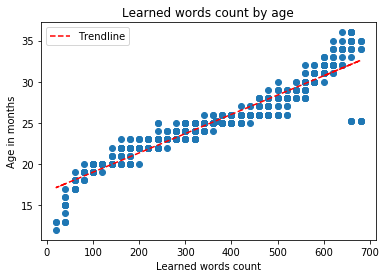

In [10]:
plt.scatter(vocabulary_data.Learned_words_count, vocabulary_data.Years_old)
plt.title("Learned words count by age")
plt.xlabel("Learned words count")
plt.ylabel("Age in months")

def Trendline_draw(x,y):
    '''
    This function draws a trendline of the data.
    '''
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x), "r--", label = "Trendline")

Trendline_draw(vocabulary_data.Learned_words_count, vocabulary_data.Years_old)
plt.legend()
plt.show()

Normally developed children have progressive acquirement for words in the vocabulary in time. It is noticeable that actually the function that fits more accurate the data is a polinomial of third degree like the following. In terms of visualisation of fit function the studied array should be sorted.

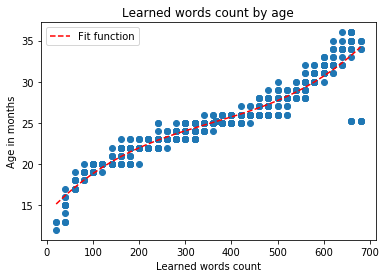

In [11]:
df_to_plot = vocabulary_data[['Learned_words_count', 'Years_old']]
df_to_plot = df_to_plot.sort_values(by="Learned_words_count")

plt.scatter(df_to_plot.Learned_words_count, df_to_plot.Years_old)
plt.title("Learned words count by age")
plt.xlabel("Learned words count")
plt.ylabel("Age in months")

def Fit_function_draw(x,y):
    '''
    This function draws a function of 3rd degree that fits the trend of the data.
    '''
    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    plt.plot(x,p(x), "r--", label = "Fit function")

Fit_function_draw(df_to_plot.Learned_words_count, df_to_plot.Years_old)
plt.legend()
plt.show()

It is interesting to explore what makes the curve more steep at the ends of the interval. What type of words children learn first and what in the end of the studied interval. For the visualization is choosen a [boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51), because we need to have information on the variability and dispersion of the data. Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

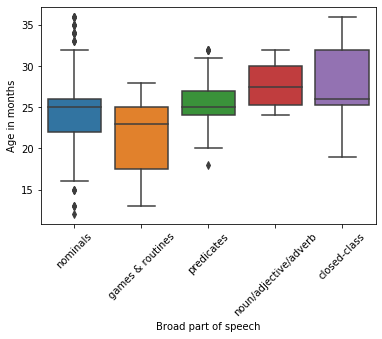

In [12]:
sns.boxplot(vocabulary_data.Broad_part, vocabulary_data.Years_old).set(
xlabel = "Broad part of speech", 
ylabel = "Age in months"
)
plt.xticks(rotation=45)
plt.show()

We could see that mostly words related to games and routines are learned first. Some of the nominals are also significantly early learned. To take a step further towards clearness it would be great to see some examples for such words.

In [13]:
vocabulary_data.Translation.groupby(vocabulary_data.Broad_part).apply(list)

Broad_part
closed-class             [they, you, yourself, them, that, this, you, y...
games & routines         [game, bathe, breakfast, go, good, bye, hello,...
nominals                 [ouch, baa, vroom, quack, grr, cock-a-doodle-d...
noun/adjective/adverb    [day, after, afternoon, afterwords, before, mo...
predicates               [work, bite, blow, brawl, build, carry, dance,...
Name: Translation, dtype: object

It is logical to wonder what specific parts of speech are included in each broad part of speech. This goes clear from the following check:

In [14]:
vocabulary_data.Specific_part.groupby(vocabulary_data.Broad_part).unique()

Broad_part
closed-class                                          [closed-class items]
games & routines                                        [games & routines]
nominals                 [sound effects, common nouns, places to go, pe...
noun/adjective/adverb                                               [time]
predicates                               [action words, descriptive words]
Name: Specific_part, dtype: object

It seems that some information about the nominals is hidden because of the display format. All specific parts of the speech included in the broad part of the speech "nominals" is visible below.

In [15]:
vocabulary_data.Specific_part[vocabulary_data.Broad_part == "nominals"].unique()

array(['sound effects', 'common nouns', 'places to go', 'people'],
      dtype=object)

The classification "Specific part of the speech" gives us more clear and specific view of the kind of the words that are learned early an those learned lated on.

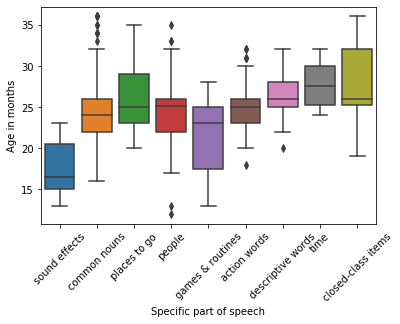

In [16]:
sns.boxplot(vocabulary_data.Specific_part, vocabulary_data.Years_old).set(
xlabel = "Specific part of speech", 
ylabel = "Age in months"
)
plt.xticks(rotation=45)
plt.show()

Let's see some examples of these words below.

In [17]:
vocabulary_data.Translation.groupby(vocabulary_data.Specific_part).apply(list)

Specific_part
action words          [work, bite, blow, brawl, build, carry, dance,...
closed-class items    [they, you, yourself, them, that, this, you, y...
common nouns          [worm, duck, monkey, bear, animal, squirrel, e...
descriptive words     [better, blue, wet, away, good, noisy, brown, ...
games & routines      [game, bathe, breakfast, go, good, bye, hello,...
people                [baby, child, childs, babysitters, grandfather...
places to go          [pool, backyard, flower, mountain, flag, sidew...
sound effects         [ouch, baa, vroom, quack, grr, cock-a-doodle-d...
time                  [day, after, afternoon, afterwords, before, mo...
Name: Translation, dtype: object

It is clearly visible that sound effects, words related to games and routines and common nouns are the words that are learned most early by the children. Descriptive words and words related to time are significantly later learned. 

This phenomenon is thoroughly explained and confirmed in Vigliocco, Gabriella & Ponari, Marta & Norbury, Courtenay's [article](https://www.researchgate.net/publication/325291276_Learning_and_Processing_Abstract_Words_and_Concepts_Insights_From_Typical_and_Atypical_Development) "Learning and Processing Abstract Words and Concepts: Insights From Typical and Atypical Development". Young children learn the meaning of concrete words by observing the connection between the words and the objects, people and actions occurring in the physical environment. Abstract words and concepts, unlike concrete words, are independent from sensory and motor contingencies. These statements find some support from studies investigating the neural systems underscoring abstract words processing. Abstract processing has been associated with higher activation in left hemispheric areas involved in linguistic processing/verbal semantics such as the left inferior frontal and superior temporal cortex (e.g., Hoffman et al., 2015, see Binder et al., 2009 and Wang et al., 2010 for reviews and meta-analyses), which development is in positive correlation with age - [Early Specialization for Voice and
Emotion Processing in the Infant Brain Report](https://www.cell.com/current-biology/pdf/S0960-9822(11)00654-3.pdf)

Correlations between fetaures of `vocabulary_data` could be shown as a [heatmap](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07), like in this [article](https://www.kaggle.com/greenhexagon/language-analysis). The correlation between `Years_old` and `Learned_words_count` is clearly noticeable and slightly the correlation between `Freq` and `Adult_to_child_freq`. 

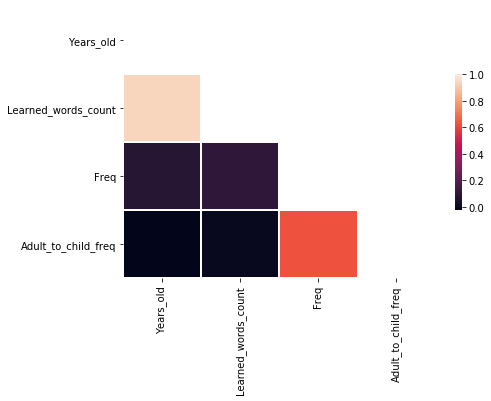

In [18]:
temp = ['Years_old','Learned_words_count','Freq','Adult_to_child_freq']
corr_total = vocabulary_data[temp].corr()
f, ax = plt.subplots(figsize=(7, 5))

mask_total = np.zeros_like(corr_total, dtype=np.bool)
mask_total[np.triu_indices_from(mask_total)] = True

sns.heatmap(corr_total, mask = mask_total, linewidths=.5, cbar_kws={"shrink":.5})
plt.show()

More interesting thing to be explored is whether frequency of use of a word makes it more early learned. Grouping by specific part of speech and showing mean values would give us that information. Creating a data frame `freq_df` would let us plot easily a bar chart with main axis `Freq_mean`(how commonly this word occurs in Norwegian) secondary axis `Freq_child_mean`(how commonly this word occurs when a Norwegian adult is talking to a Norwegian child).

In [19]:
frequency_by_type = vocabulary_data.Freq.groupby(vocabulary_data.Specific_part).mean()
frequency_to_child_by_type = vocabulary_data.Adult_to_child_freq.groupby(vocabulary_data.Specific_part).mean()

In [20]:
data_freq = list(zip(frequency_by_type.keys(), frequency_by_type.values, frequency_to_child_by_type.values ))
freq_df = pd.DataFrame(data_freq, columns = ["Specific_part", "Freq_mean", "Freq_child_mean"])
freq_df = freq_df.set_index("Specific_part")
freq_df

,Freq_mean,Freq_child_mean
Specific_part,,
action words,2.585821e+05,55.343080
closed-class items,1.972606e+06,348.469697
common nouns,2.472198e+04,11.272155
descriptive words,1.625032e+05,23.476190
games & routines,3.091825e+05,194.629630
people,1.046910e+05,28.797487
places to go,7.197394e+04,15.619901
sound effects,3.812274e+04,46.916667
time,3.463156e+05,41.187500


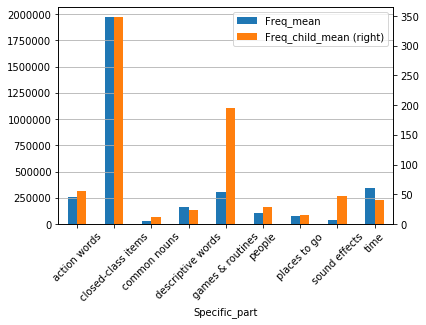

In [21]:
freq_df.plot(kind= "bar" , secondary_y= "Freq_child_mean" , rot= 45).grid(axis = "y")
plt.show()

From the plot we could see that closed-class items are most frequently used in Norwegian and when talking to a child. This is somehow expected, because of lingustic specifics. These are the words that do a lot of grammatical work.

Next most frequent words in Norwegian are about time, games & routines and action words. Distinctively more frequent does an adult talk to a child about games & routines and use sound effects. Exactly these specific parts of the speech were in leading positions in early learning. Let's try to see a correlation between frequency of usage of these categories and age of learning.

In [22]:
def Correlation_calculation(df):
    corr = df[temp].corr()
    f, ax = plt.subplots(figsize=(4, 3))
    
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(corr, mask = mask, linewidths=.5, cbar_kws={"shrink":.5})
    plt.title(freq_df.index[i])
    plt.show()

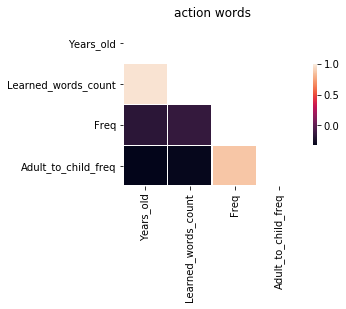

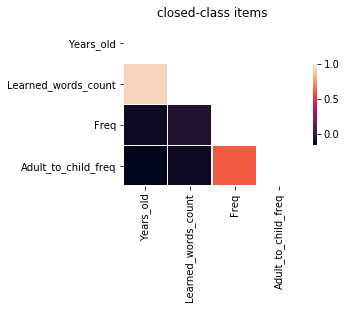

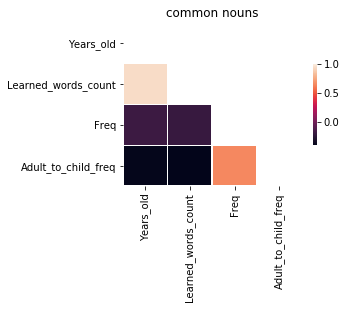

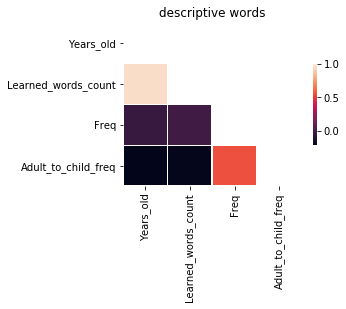

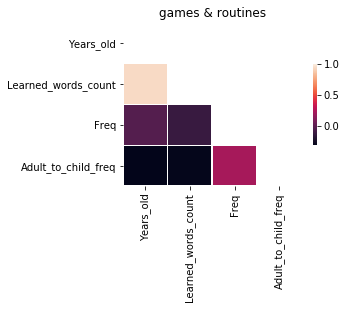

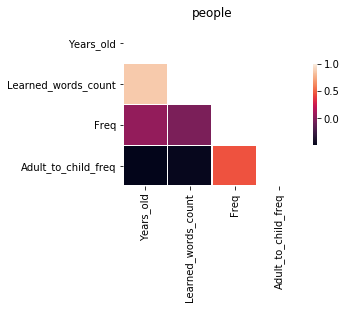

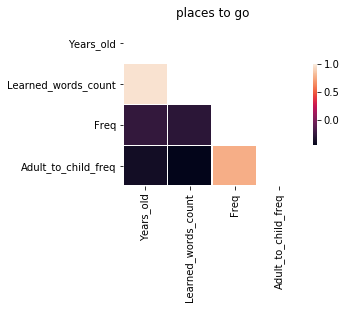

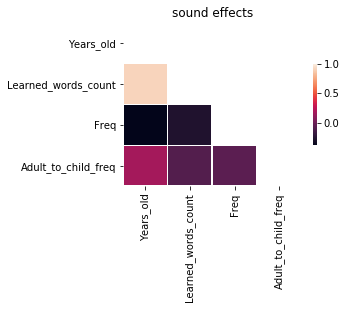

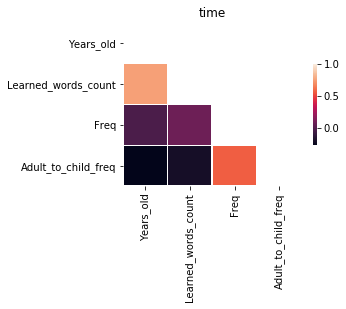

In [23]:
for i in range(len(freq_df)):
    current_df = vocabulary_data[vocabulary_data.Specific_part == freq_df.index[i]]
    Correlation_calculation(current_df)

Regarding `games & routines` word frequency in Norwegian seem to be somehow correlated with age of the child, but more positive is this correlation regarding `people`. The more frequently a word of specific type of speech `people` is used in Norwegian, the younger the child learns the word. Also there is some correlation between frequency of mentioning the word when talking to a child and the age of the child regarding `sound effects`. The more frequent the adult uses sound effects in talking to a child the more early the child learnes the sound effect. Parts of the speech that seem to have some correlation between frequency of using the word and age when the child learned the word, consist mainly of concrete words(excluding common nouns, where we have concrete words, but there doesn't seem to be a correlation between frequency and age), not abstract, but this could not with a certainty, given the results.

#### Unstructured dataset exploration

Let's check whether the preschool animated television series "Pepa Pig" consists of the same words as young children know. Transcripts for two seasons are taken from [here](http://glamour-and-discourse.blogspot.com/p/peppa-pig-episode-transcripts.html)

When working with files, it's good practice to use the with open...as compound statement. It's the cleanest way to open a file, operate on it, and close the file, all in one easy-to-read block of code. The file is automatically closed when the code block completes.

After reading the file, first part of the text is displayed.

In [24]:
pepa_pig = ""
with open("data/pepa_pig.txt", "r", encoding = "utf-8") as f:
    pepa_pig = f.read()
print(pepa_pig[:200])

SEASON 1

1. Muddy Puddles

Narrator: It is raining today. So Peppa and George cannot play outside.

Peppa Pig: Daddy, it's stopped raining.

Peppa Pig: Can we go out to play?

Daddy Pig: All right, r


Transcripts need to be cleaned from the character names in the first part of each line (e.g. `Narrator: `, `Peppa Pig: `, etc.). This task and splitting the text on separate words is completed by using [regular expressions](https://regexr.com/). We also need all the words to be in lowercase.

In [25]:
pepa_pig = re.sub("(([A-Z][a-z]*:)|([A-Z][a-z]* [A-Z][a-z]*):)", "", pepa_pig)
pepa_pig_words = re.split("\W+", pepa_pig)
pepa_pig_words = [word.lower() for word in pepa_pig_words]

In [26]:
len(pepa_pig_words)

31480

The easiest way to count the words in the file is using the library `collections.Counter()`

In [27]:
pepa_pig_word_counter = Counter(pepa_pig_words)

In [28]:
len(pepa_pig_word_counter)

1994

In [29]:
pepa_pig_word_counter.most_common(20)

[('the', 1065),
 ('i', 839),
 ('you', 799),
 ('s', 749),
 ('a', 706),
 ('and', 697),
 ('george', 669),
 ('peppa', 665),
 ('to', 630),
 ('pig', 626),
 ('is', 587),
 ('it', 525),
 ('daddy', 493),
 ('in', 320),
 ('are', 307),
 ('mummy', 304),
 ('we', 302),
 ('can', 291),
 ('t', 269),
 ('what', 237)]

Comparing two lists of strings is a typical problem and is easier to handle, so the dataframe `vocabulary_data.Translation` is saved in to a list with which we are going to work. To get more concrete results stemmer is applied also on `list_translation`

In [30]:
list_translation = list(vocabulary_data.Translation)

We need to explore the known and unknown words in "Pepa Pig", so we could filter the words in the two lists `pepa_pig_word_counter` and `list_translation` like this:

In [31]:
known_words_pepa = [string for string in pepa_pig_word_counter if string in list_translation]
len(known_words_pepa)

418

We could calculate how many words from the text are known by young children with the algorithm below:

In [32]:
sum_of_known_words = 0
for i in range(len(known_words_pepa)):
    sum_of_known_words += pepa_pig_word_counter[known_words_pepa[i]]
sum_of_known_words

17448

Personal names of the [characters](https://www.peppapig.com/characters/) should be excluded from total words number. 

In [33]:
total_words_number = (len(pepa_pig_words) 
    - pepa_pig_word_counter["peppa"] 
    - pepa_pig_word_counter["george"] 
    - pepa_pig_word_counter["suzy"] 
    - pepa_pig_word_counter["pedro"] 
    - pepa_pig_word_counter["danny"] 
    - pepa_pig_word_counter["rebecca"] 
    - pepa_pig_word_counter["richard"]
    - pepa_pig_word_counter["emily"]
    - pepa_pig_word_counter["zoë"])
total_words_number

29904

Now we could calculate what percent of the words in the movie are known by young children.

In [34]:
print("%.2f%%" % (100 * float(sum_of_known_words)/float(total_words_number)))

58.35%


We could see from the list with unknown words below, that there are forms of words that are actually known by young children. This miss could be fixed with [Porter's Algorithm](http://www.nltk.org/_modules/nltk/stem/porter.html) for stemming.

In [35]:
unknown_words_pepa = [string for string in pepa_pig_words if string not in list_translation]
unknown_words_pepa

['season',
 '1',
 '1',
 'muddy',
 'puddles',
 'it',
 'raining',
 'so',
 'peppa',
 'george',
 'cannot',
 'it',
 's',
 'stopped',
 'raining',
 'out',
 'all',
 'right',
 'along',
 'two',
 'peppa',
 'loves',
 'jumping',
 'muddy',
 'puddles',
 'muddy',
 'puddles',
 'peppa',
 'muddy',
 'puddles',
 'must',
 'wear',
 'sorry',
 'george',
 'likes',
 'muddy',
 'puddles',
 'george',
 'muddy',
 'puddles',
 'must',
 'wear',
 'peppa',
 'likes',
 'little',
 'george',
 'george',
 's',
 'some',
 'puddles',
 'peppa',
 'george',
 'are',
 'having',
 'lot',
 'of',
 'fun',
 'peppa',
 'found',
 'little',
 'puddle',
 'george',
 'found',
 'puddle',
 'george',
 's',
 'really',
 'puddle',
 'george',
 'wants',
 'into',
 'puddle',
 'george',
 'must',
 'check',
 'it',
 's',
 'safe',
 'it',
 'safe',
 'sorry',
 'george',
 'it',
 's',
 'only',
 'mud',
 'peppa',
 'george',
 'jumping',
 'muddy',
 'puddles',
 'come',
 'george',
 's',
 'goodness',
 'guess',
 've',
 'been',
 'doing',
 'been',
 'watching',
 'television',
 'j

Let's try the calculation with stemming.

In [36]:
stemmer = PorterStemmer()
pepa_word_stems = [stemmer.stem(word) for word in pepa_pig_words]

In [37]:
stem_counter = Counter(pepa_word_stems)
stem_counter.most_common(20)

[('the', 1065),
 ('i', 839),
 ('you', 799),
 ('s', 749),
 ('a', 706),
 ('and', 697),
 ('georg', 669),
 ('peppa', 665),
 ('to', 630),
 ('pig', 627),
 ('is', 587),
 ('it', 526),
 ('daddi', 496),
 ('in', 320),
 ('mummi', 307),
 ('are', 307),
 ('we', 302),
 ('can', 295),
 ('t', 269),
 ('what', 237)]

In [38]:
list_translation_stem = [stemmer.stem(word) for word in list_translation]

In [39]:
known_stem_words_pepa = [string for string in stem_counter if string in list_translation_stem]
len(known_stem_words_pepa)

434

In [40]:
sum_of_known_stem_words = 0
for i in range(len(known_stem_words_pepa)):
    sum_of_known_stem_words += stem_counter[known_stem_words_pepa[i]]
sum_of_known_stem_words

18635

In [41]:
print("%.2f%%" % (100 * float(sum_of_known_stem_words)/float(total_words_number)))

62.32%


With stemming we get about 5% more known words.

As a result we could say that young children understand about 62% of the words in the preschool animated television series "Pepa Pig".

In terms of exploration of words type in the choosen text, we would use `pepa_pig_word_counter`. Extracting the words types in it will give us information whether this movie is written with more concrete words, that are easily and early learned by young children.

In [42]:
special_type_of_speech = []
exact_word_count = []
age_learned = []
for i in range(len(known_words_pepa)):
    special_type_of_speech.append(vocabulary_data.Specific_part.loc[vocabulary_data.Translation == known_words_pepa[i]].values[0])
    exact_word_count.append(pepa_pig_word_counter[known_words_pepa[i]])
    age_learned.append(vocabulary_data.Years_old.loc[vocabulary_data.Translation == known_words_pepa[i]].values[0])

In [43]:
df = pd.DataFrame(known_words_pepa, columns = ["Word"])
df["Specific_part"] = special_type_of_speech
df["Word_count"] = exact_word_count
df["Years_old"] = age_learned
df

,Word,Specific_part,Word_count,Years_old
0,is,closed-class items,587,26.000000
1,today,time,36,27.000000
2,and,closed-class items,697,25.000000
3,play,common nouns,121,25.228777
4,outside,places to go,10,20.000000
...,...,...,...,...
413,mouse,common nouns,3,21.000000
414,train,common nouns,3,20.000000
415,window,common nouns,1,25.000000
416,choo,sound effects,4,23.000000


Let's check whether we get a similar box plot for this data as in the first part of the study.

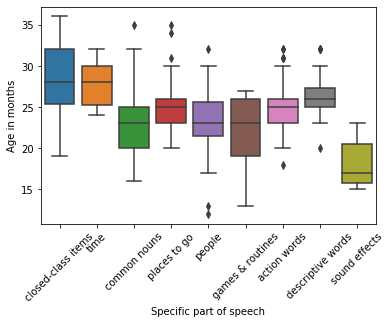

In [44]:
sns.boxplot(df.Specific_part, df.Years_old).set(
xlabel = "Specific part of speech", 
ylabel = "Age in months"
)
plt.xticks(rotation=45)
plt.show()

The graphic shows similar distribution of type of words vs. age. 

Below we could see how frequent types of words are in the text:

In [45]:
word_count_by_type = df.Word_count.groupby(df.Specific_part).sum()
word_count_by_type

Specific_part
action words          1459
closed-class items    9153
common nouns          2010
descriptive words      611
games & routines      1295
people                 887
places to go          1403
sound effects          257
time                   373
Name: Word_count, dtype: int64

This information would be visualized best by a bar chart, because it best shows how one numeric value compares among different categories.

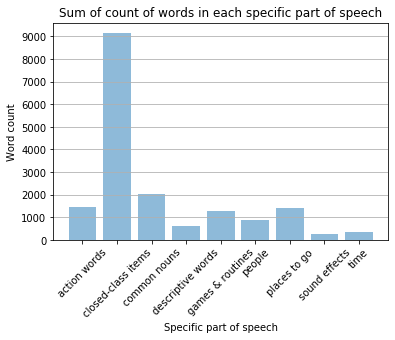

In [46]:
objects = word_count_by_type.keys()
y_pos = np.arange(len(objects))
performance = word_count_by_type.values

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 10000, 1000))
plt.xlabel('Specific part of speech')
plt.ylabel('Word count')
plt.title('Sum of count of words in each specific part of speech')
plt.grid(axis = "y")
plt.show()

In [47]:
df.Word[df.Specific_part == "closed-class items"][:10]

0       is
2      and
6      can
7       we
9       to
11     you
12      in
13       i
15      if
17    your
Name: Word, dtype: object

If we disregard the highest word count of closed-class items (these are the words making connections between other words and it is expected they are most frequent), we could notice that most frequent are comon nouns that are definitely concrete words. Abstract words as time describing are very rare in the text.

#### 6. Results

Age of acquisition correlated highly with vocabulary size of acquisition. Young children start to learn concrete words, earlier than abstract words and concepts. Frequency of word use seem to have slight effect on children learnability for separate specific parts of the speech, like "people", "games & routines" and "sound effects".

#### 7. Conclusion

Young children learn concrete words earlier and they understand most of the words in preschool movies. The words in such texts are selected to that children understand them in early age.

#### Acknowledgements
This dataset was collected by Pernille Hansen:

Hansen (2016). What makes a word easy to acquire? The effects of word class, frequency, imageability and phonological neighbourhood density on lexical development. First Language. Advance online publication. doi: 10.1177/0142 723716679956 http://dx.doi.org/10.1177/0142723716679956

#### References
[1] Pernille Hansen, MultiLing, Department of Linguistics and Scandinavian Studies, University of Oslo, P.O. Box 1102, Blindern, 0316 Oslo, Norway. Email: pernille.hansen@iln.uio.no: http://dx.doi.org/10.1177/0142723716679956

[2] Leopold, Werner (1939). Speech Development of a Bilingual Child: a Linguist's Record: Volume 1: Vocabulary Growth in the first Two Years , Evanston: Northwestern University Press: https://childes.talkbank.org/diaries/Leopold.pdf

[3] Claire Noble, Thea Cameron-Faulkner, Andrew Jessop, Anna Coates,
Hannah Sawyer, Rachel Taylor-Ims, and Caroline F. Rowlandc, The Impact of Interactive Shared Book
Reading on Children’s Language Skills: A Randomized Controlled Trial: https://pure.mpg.de/rest/items/item_3238784_4/component/file_3241384/content

[4] Essentials of Linguistics: CLOSED CLASS CATEGORIES (FUNCTION WORDS): https://essentialsoflinguistics.pressbooks.com/chapter/7-4-closed-class-categories-function-words/

[5] Wikipedia, Syntactic category: https://en.wikipedia.org/wiki/Syntactic_category

[6] Vigliocco, Gabriella & Ponari, Marta & Norbury, Courtenay. (2017). Learning and Processing Abstract Words and Concepts: Insights From Typical and Atypical Development. Topics in Cognitive Science. 10. 10.1111/tops.12347.: https://www.researchgate.net/publication/325291276_Learning_and_Processing_Abstract_Words_and_Concepts_Insights_From_Typical_and_Atypical_Development

[7] Understanding Boxplots, Michael Galarnyk: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

[8] Seaborn Heatmaps: 13 Ways to Customize Correlation Matrix Visualizations: https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07

[9] Hoffman et al., 2015, see Binder et al., 2009 and Wang et al., 2010: https://www.sciencedirect.com/science/article/pii/S0149763417305249#bib0105
https://www.sciencedirect.com/science/article/pii/S0149763417305249#bib0025


[10] Early Specialization for Voice and Emotion Processing in the Infant Brain, Anna Blasi,Evelyne Mercure,Sarah Lloyd-Fox,Alex Thomson,Michael Brammer,Disa Sauter,Quinton Deeley,Gareth J. Barker,Ville Renvall,Sean Deoni,David Gasston,Steven C.R. Williams,Mark H. Johnson,Andrew Simmons and Declan G.M. Murphy: https://www.cell.com/current-biology/pdf/S0960-9822(11)00654-3.pdf